In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

# Load

In [2]:
df_train = pd.read_csv('data/application_train.csv')

In [3]:
df_test = pd.read_csv('data/application_test.csv')

In [4]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def perc_null(col):
    '''
    Makes a pretty print out of the percent of null values in each column
    '''
    print('\n', '-' * 50, '\n', col, '\n')
    train_null = len(df_train[df_train[col].isnull()])
    test_null = len(df_test[df_test[col].isnull()])
    if train_null == 0:
        print('Train: 0')
    else:
        print('Train: ', train_null)
        print(round(train_null/len(df_train), 3))
    if test_null == 0:
        print('Test: 0')
    else:
        print('Test: ', test_null)
        print(round(test_null/len(df_test), 3))

In [6]:
for col in df_train.columns.tolist()[2:]:
    perc_null(col)


 -------------------------------------------------- 
 NAME_CONTRACT_TYPE 

Train: 0
Test: 0

 -------------------------------------------------- 
 CODE_GENDER 

Train: 0
Test: 0

 -------------------------------------------------- 
 FLAG_OWN_CAR 

Train: 0
Test: 0

 -------------------------------------------------- 
 FLAG_OWN_REALTY 

Train: 0
Test: 0

 -------------------------------------------------- 
 CNT_CHILDREN 

Train: 0
Test: 0

 -------------------------------------------------- 
 AMT_INCOME_TOTAL 

Train: 0
Test: 0

 -------------------------------------------------- 
 AMT_CREDIT 

Train: 0
Test: 0

 -------------------------------------------------- 
 AMT_ANNUITY 

Train:  12
0.0
Test:  24
0.0

 -------------------------------------------------- 
 AMT_GOODS_PRICE 

Train:  278
0.001
Test: 0

 -------------------------------------------------- 
 NAME_TYPE_SUITE 

Train:  1292
0.004
Test:  911
0.019

 -------------------------------------------------- 
 NAME_INCOME_TYPE 

T

Train:  210199
0.684
Test:  32780
0.672

 -------------------------------------------------- 
 LIVINGAREA_MEDI 

Train:  154350
0.502
Test:  23552
0.483

 -------------------------------------------------- 
 NONLIVINGAPARTMENTS_MEDI 

Train:  213514
0.694
Test:  33347
0.684

 -------------------------------------------------- 
 NONLIVINGAREA_MEDI 

Train:  169682
0.552
Test:  26084
0.535

 -------------------------------------------------- 
 FONDKAPREMONT_MODE 

Train:  210295
0.684
Test:  32797
0.673

 -------------------------------------------------- 
 HOUSETYPE_MODE 

Train:  154297
0.502
Test:  23619
0.485

 -------------------------------------------------- 
 TOTALAREA_MODE 

Train:  148431
0.483
Test:  22624
0.464

 -------------------------------------------------- 
 WALLSMATERIAL_MODE 

Train:  156341
0.508
Test:  23893
0.49

 -------------------------------------------------- 
 EMERGENCYSTATE_MODE 

Train:  145755
0.474
Test:  22209
0.456

 -----------------------------------

# Messy EDA

Percent of defaults in training df

In [7]:
round(len(df_train[df_train['TARGET'] == 1])/len(df_train), 4)

0.0807

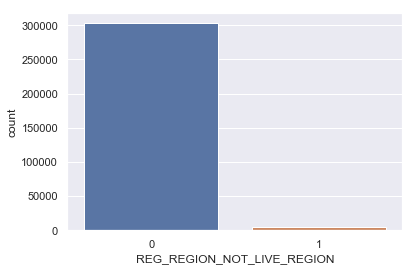

In [8]:
sns.countplot(df_train['REG_REGION_NOT_LIVE_REGION'])

In [9]:
temp = df_train[df_train['REGION_RATING_CLIENT_W_CITY'] == 3]

In [10]:
len(temp[temp['TARGET'] == 1])/len(temp)

0.1140218878248974

# Drop Columns Testing

In [11]:
temp = df_train.copy()
temp.columns = [col.lower() for col in temp.columns]
temp.drop(temp.columns[range(44, 91)], inplace=True, axis=1)

In [12]:
drop_cols = [
    'weekday_appr_process_start',
    'amt_req_credit_bureau_hour',
    'amt_req_credit_bureau_week',
    'amt_req_credit_bureau_mon',
    'amt_req_credit_bureau_year',
]

for col in drop_cols:
    temp.drop(col, inplace=True, axis=1)

There should only be 70 columns now, down from 122

In [13]:
print(temp.shape)

(307511, 70)


## Clean and Bin Gender

In [14]:
np.unique(temp['code_gender'])

array(['F', 'M', 'XNA'], dtype=object)

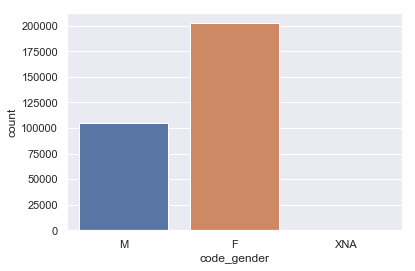

In [15]:
sns.countplot(temp['code_gender'])

In [16]:
idxs = temp[temp['code_gender'] == 'XNA'].index
print(idxs)

Int64Index([35657, 38566, 83382, 189640], dtype='int64')


In [17]:
idxs = temp[temp['code_gender'] == 'XNA'].index

for idx in idxs:
    temp.at[idx, 'code_gender'] = 'F'
np.unique(temp['code_gender'])

array(['F', 'M'], dtype=object)

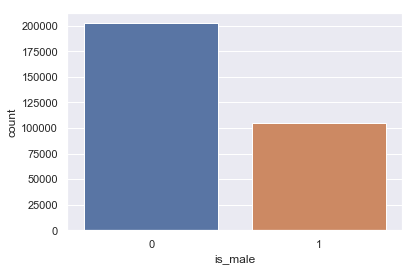

In [18]:
foo = lambda x: 1 if x == 'M' else 0
temp['code_gender'] = temp['code_gender'].apply(foo)
temp.rename(columns={'code_gender': 'is_male'}, inplace=True)
sns.countplot(temp['is_male'])